In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import scipy.io as sio
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

In [2]:
#Datasets given
mat = sio.loadmat('2010rainfall.mat')
mat2 = sio.loadmat('2011rainfall.mat')

In [3]:
#Function to get the complete master dataset  
def derive_feature(data,mat,idx,no_idx,string):
    dat=pd.DataFrame()
    if idx == no_idx:
        return
    else:
        dat['X'+str(idx)+'t'] = mat[string][idx]
        dat['X'+str(idx)+'t']=dat['X'+str(idx)+'t'].shift(-2)
        dat.dropna(inplace=True)
        dat.reset_index(inplace=True)
        dat.drop(['index'],axis=1,inplace=True)
        data['X'+str(idx)+'t'] = dat['X'+str(idx)+'t']

In [4]:
#Function to normalize the dataset
def normalise(data):
    for column in data.columns:
        min=np.min(data[column])
        max=np.max(data[column])
        if max==min:
            return
        else:
            for i in range(len(data[column])):
                data[column][i] = (data[column][i]-min)/(max-min)

## Regression Analysis for the rainfall in the 3 cities namely Mumbai, Delhi and Kharagpur

Preparing the training and testing datasets for the rerespective cities

In [5]:
# Training data for Mumbai
dataM=pd.DataFrame()
x_t2 = mat['XR1'][42]
dataM['t-2']=x_t2
dataM['t-1']=dataM['t-2'].shift(-1)
dataM['t']=dataM['t-2'].shift(-2)
dataM.head()
dataM.dropna(inplace=True)
dataM.reset_index(inplace=True)
dataM.drop(['index'],axis=1,inplace=True)
no_idx=42
for idx in range(357):
    derive_feature(dataM,mat,idx,no_idx,'XR1')
dataM

,t-2,t-1,t,X0t,X1t,X2t,X3t,X4t,X5t,X6t,...,X347t,X348t,X349t,X350t,X351t,X352t,X353t,X354t,X355t,X356t
0,0.575581,5.029237,0.000000,0.000000,0.000000,10.927622,6.805963,6.611897,0.000000,0.0,...,2.713624,3.600000,3.600033,3.600000,1.800000,3.600000,2.400000,0.0,0.0,0.0
1,5.029237,0.000000,0.357851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,13.680507,18.700001,18.699162,18.700001,9.350000,18.700003,12.466667,0.0,0.0,0.0
2,0.000000,0.357851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.861074,5.200000,5.199905,5.200000,2.600000,5.200000,3.466666,0.0,0.0,0.0
3,0.357851,0.000000,0.000000,13.246254,13.200000,18.999964,23.731779,10.257844,13.199999,0.0,...,26.138655,34.400002,34.400826,34.400002,17.200001,34.400005,22.933334,0.0,0.0,0.0
4,0.000000,0.000000,7.552819,67.325218,67.599998,27.752983,33.303631,56.923618,67.599998,0.0,...,9.951601,11.800000,11.802683,11.800000,5.900000,11.800001,7.866667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,1.187062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,33.453896,44.599998,44.600006,44.599998,22.299999,44.599998,29.733332,0.0,0.0,0.0
116,1.187062,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,21.157650,28.000000,28.000383,27.999998,13.999999,28.000002,18.666666,0.0,0.0,0.0
117,0.000000,0.000000,14.831300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.316267,1.700000,1.702536,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0
118,0.000000,14.831300,6.216457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.393724,1.700000,1.700289,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0


In [6]:
# Training data for Delhi
dataD=pd.DataFrame()
x_t2 = mat['XR1'][158]
dataD['t-2']=x_t2
dataD['t-1']=dataD['t-2'].shift(-1)
dataD['t']=dataD['t-2'].shift(-2)
dataD.head()
dataD.dropna(inplace=True)
dataD.reset_index(inplace=True)
dataD.drop(['index'],axis=1,inplace=True)
no_idx=158
for idx in range(357):
    derive_feature(dataD,mat,idx,no_idx,'XR1')
dataD

,t-2,t-1,t,X0t,X1t,X2t,X3t,X4t,X5t,X6t,...,X347t,X348t,X349t,X350t,X351t,X352t,X353t,X354t,X355t,X356t
0,0.0,0.0,0.0,0.000000,0.000000,10.927622,6.805963,6.611897,0.000000,0.0,...,2.713624,3.600000,3.600033,3.600000,1.800000,3.600000,2.400000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,13.680507,18.700001,18.699162,18.700001,9.350000,18.700003,12.466667,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.861074,5.200000,5.199905,5.200000,2.600000,5.200000,3.466666,0.0,0.0,0.0
3,0.0,0.0,0.0,13.246254,13.200000,18.999964,23.731779,10.257844,13.199999,0.0,...,26.138655,34.400002,34.400826,34.400002,17.200001,34.400005,22.933334,0.0,0.0,0.0
4,0.0,0.0,0.0,67.325218,67.599998,27.752983,33.303631,56.923618,67.599998,0.0,...,9.951601,11.800000,11.802683,11.800000,5.900000,11.800001,7.866667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,33.453896,44.599998,44.600006,44.599998,22.299999,44.599998,29.733332,0.0,0.0,0.0
116,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,21.157650,28.000000,28.000383,27.999998,13.999999,28.000002,18.666666,0.0,0.0,0.0
117,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.316267,1.700000,1.702536,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0
118,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.393724,1.700000,1.700289,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0


In [7]:
# Training data for Kharagpur
dataK=pd.DataFrame()
x_t2 = mat['XR1'][299]
dataK['t-2']=x_t2
dataK['t-1']=dataK['t-2'].shift(-1)
dataK['t']=dataK['t-2'].shift(-2)
dataK.head()
dataK.dropna(inplace=True)
dataK.reset_index(inplace=True)
dataK.drop(['index'],axis=1,inplace=True)
no_idx=299
for idx in range(357):
    derive_feature(dataK,mat,idx,no_idx,'XR1')
dataK

,t-2,t-1,t,X0t,X1t,X2t,X3t,X4t,X5t,X6t,...,X347t,X348t,X349t,X350t,X351t,X352t,X353t,X354t,X355t,X356t
0,0.955372,0.00000,8.396420,0.000000,0.000000,10.927622,6.805963,6.611897,0.000000,0.0,...,2.713624,3.600000,3.600033,3.600000,1.800000,3.600000,2.400000,0.0,0.0,0.0
1,0.000000,8.39642,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,13.680507,18.700001,18.699162,18.700001,9.350000,18.700003,12.466667,0.0,0.0,0.0
2,8.396420,0.00000,1.387120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,3.861074,5.200000,5.199905,5.200000,2.600000,5.200000,3.466666,0.0,0.0,0.0
3,0.000000,1.38712,0.000000,13.246254,13.200000,18.999964,23.731779,10.257844,13.199999,0.0,...,26.138655,34.400002,34.400826,34.400002,17.200001,34.400005,22.933334,0.0,0.0,0.0
4,1.387120,0.00000,0.100161,67.325218,67.599998,27.752983,33.303631,56.923618,67.599998,0.0,...,9.951601,11.800000,11.802683,11.800000,5.900000,11.800001,7.866667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.722775,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,33.453896,44.599998,44.600006,44.599998,22.299999,44.599998,29.733332,0.0,0.0,0.0
116,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,21.157650,28.000000,28.000383,27.999998,13.999999,28.000002,18.666666,0.0,0.0,0.0
117,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,2.316267,1.700000,1.702536,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0
118,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.393724,1.700000,1.700289,1.700000,0.850000,1.700000,1.133333,0.0,0.0,0.0


In [8]:
# Test data for Mumbai
dataMt=pd.DataFrame()
x_t2 = mat2['XR'][42]
dataMt['t-2']=x_t2
dataMt['t-1']=dataMt['t-2'].shift(-1)
dataMt['t']=dataMt['t-2'].shift(-2)
dataMt.head()
dataMt.dropna(inplace=True)
dataMt.reset_index(inplace=True)
dataMt.drop(['index'],axis=1,inplace=True)
no_idx=42
for idx in range(357):
    derive_feature(dataMt,mat2,idx,no_idx,'XR')
dataMt

,t-2,t-1,t,X0t,X1t,X2t,X3t,X4t,X5t,X6t,...,X347t,X348t,X349t,X350t,X351t,X352t,X353t,X354t,X355t,X356t
0,0.000000,0.000000,37.165531,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,17.481712,23.200001,23.199682,17.077726,17.000000,17.000019,16.999998,17.000000,0.0,8.499999
1,0.000000,37.165531,28.451679,0.0,0.0,21.500555,0.0,0.0,0.0,0.0,...,68.876274,73.500000,73.499657,68.562683,68.499992,68.500015,68.500000,68.500000,0.0,34.250000
2,37.165531,28.451679,67.294327,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,5.899258,2.200000,2.200939,6.051106,6.099999,6.099988,6.100000,6.099999,0.0,3.050000
3,28.451679,67.294327,7.027927,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,19.451229,7.600000,7.600328,20.338278,20.499998,20.499962,20.500000,20.500000,0.0,10.250000
4,67.294327,7.027927,7.370414,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.000000,1.067681,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,15.174490,5.600000,5.601070,15.770872,15.899999,15.899967,15.900000,15.900000,0.0,7.950000
116,1.067681,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.282759,0.000000,0.000000,0.197493,0.200000,0.199999,0.200000,0.200000,0.0,0.100000
117,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.991117,0.000000,0.000000,0.987463,1.000000,0.999997,1.000000,1.000000,0.0,0.500000
118,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [9]:
# Test data for Delhi
dataDt=pd.DataFrame()
x_t2 = mat2['XR'][158]
dataDt['t-2']=x_t2
dataDt['t-1']=dataDt['t-2'].shift(-1)
dataDt['t']=dataDt['t-2'].shift(-2)
dataDt.head()
dataDt.dropna(inplace=True)
dataDt.reset_index(inplace=True)
dataDt.drop(['index'],axis=1,inplace=True)
no_idx=158
for idx in range(357):
    derive_feature(dataDt,mat2,idx,no_idx,'XR')
dataDt

,t-2,t-1,t,X0t,X1t,X2t,X3t,X4t,X5t,X6t,...,X347t,X348t,X349t,X350t,X351t,X352t,X353t,X354t,X355t,X356t
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,17.481712,23.200001,23.199682,17.077726,17.000000,17.000019,16.999998,17.000000,0.0,8.499999
1,0.0,0.0,0.0,0.0,0.0,21.500555,0.0,0.0,0.0,0.0,...,68.876274,73.500000,73.499657,68.562683,68.499992,68.500015,68.500000,68.500000,0.0,34.250000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,5.899258,2.200000,2.200939,6.051106,6.099999,6.099988,6.100000,6.099999,0.0,3.050000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,19.451229,7.600000,7.600328,20.338278,20.499998,20.499962,20.500000,20.500000,0.0,10.250000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,15.174490,5.600000,5.601070,15.770872,15.899999,15.899967,15.900000,15.900000,0.0,7.950000
116,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.282759,0.000000,0.000000,0.197493,0.200000,0.199999,0.200000,0.200000,0.0,0.100000
117,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.991117,0.000000,0.000000,0.987463,1.000000,0.999997,1.000000,1.000000,0.0,0.500000
118,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [10]:
# Test data for Kharagpur
dataKt=pd.DataFrame()
x_t2 = mat2['XR'][299]
dataKt['t-2']=x_t2
dataKt['t-1']=dataKt['t-2'].shift(-1)
dataKt['t']=dataKt['t-2'].shift(-2)
dataKt.head()
dataKt.dropna(inplace=True)
dataKt.reset_index(inplace=True)
dataKt.drop(['index'],axis=1,inplace=True)
no_idx=299
for idx in range(357):
    derive_feature(dataKt,mat2,idx,no_idx,'XR')
dataKt

,t-2,t-1,t,X0t,X1t,X2t,X3t,X4t,X5t,X6t,...,X347t,X348t,X349t,X350t,X351t,X352t,X353t,X354t,X355t,X356t
0,17.945692,0.000000,3.054594,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,17.481712,23.200001,23.199682,17.077726,17.000000,17.000019,16.999998,17.000000,0.0,8.499999
1,0.000000,3.054594,0.000000,0.0,0.0,21.500555,0.0,0.0,0.0,0.0,...,68.876274,73.500000,73.499657,68.562683,68.499992,68.500015,68.500000,68.500000,0.0,34.250000
2,3.054594,0.000000,2.714752,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,5.899258,2.200000,2.200939,6.051106,6.099999,6.099988,6.100000,6.099999,0.0,3.050000
3,0.000000,2.714752,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,19.451229,7.600000,7.600328,20.338278,20.499998,20.499962,20.500000,20.500000,0.0,10.250000
4,2.714752,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1.952580,9.481996,0.366239,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,15.174490,5.600000,5.601070,15.770872,15.899999,15.899967,15.900000,15.900000,0.0,7.950000
116,9.481996,0.366239,0.403537,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.282759,0.000000,0.000000,0.197493,0.200000,0.199999,0.200000,0.200000,0.0,0.100000
117,0.366239,0.403537,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.991117,0.000000,0.000000,0.987463,1.000000,0.999997,1.000000,1.000000,0.0,0.500000
118,0.403537,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [11]:
# Train X,Y variables declared 
X_trainM = dataM.drop(['t'],axis=1)
normalise(X_trainM)   
y_trainM = dataM['t']

X_trainD = dataD.drop(['t'],axis=1)
normalise(X_trainD)   
y_trainD = dataD['t']

X_trainK = dataK.drop(['t'],axis=1)
normalise(X_trainK)   
y_trainK = dataK['t']

In [12]:
# Test X,Y variables declared 
X_testM = dataMt.drop(['t'],axis=1)
normalise(X_testM)
y_testM = dataMt['t']

X_testD = dataDt.drop(['t'],axis=1)
normalise(X_testD)
y_testD = dataDt['t']

X_testK = dataKt.drop(['t'],axis=1)
normalise(X_testK)
y_testK = dataKt['t']

## Linear Regression for 3 different cities
1) Mumbai (s=42)
<br /> 2) Delhi (s=158)
<br /> 3) Kharagpur (s=299)

In [13]:
#Training For Mumbai
regressorM = LinearRegression()
regressorM.fit(X_trainM, y_trainM)
#Training For Delhi
regressorD = LinearRegression()
regressorD.fit(X_trainD, y_trainD)
#Training For Kharagpur
regressorK = LinearRegression()
regressorK.fit(X_trainK, y_trainK)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#Predictions for Mumbai for year 2011
predsM=regressorM.predict(X_testM)
#Predictions for Delhi for year 2011
predsD=regressorD.predict(X_testD)
#Predictions for Kharagpur for year 2011
predsK=regressorK.predict(X_testK)

### RMSE(Root Mean Squared Error) of Simple Linear Regression model for Mumbai, Delhi and Kharagpur for year 2011

In [15]:
RMSEreg_M = np.sqrt(np.square(np.subtract(y_testM,predsM)).mean())
RMSEreg_D = np.sqrt(np.square(np.subtract(y_testD,predsD)).mean())
RMSEreg_K = np.sqrt(np.square(np.subtract(y_testK,predsK)).mean())
print('The RMSE(Linear) for Mumbai is:',RMSEreg_M)
print('The RMSE(Linear) for Delhi is:',RMSEreg_D)
print('The RMSE(Linear) for Kharagpur is:',RMSEreg_K)

The RMSE(Linear) for Mumbai is: 26.532080942481173
The RMSE(Linear) for Delhi is: 13.611806061262481
The RMSE(Linear) for Kharagpur is: 16.35684457650534


## Lasso Regression for 3 different cities
1) Mumbai (s=42)
<br /> 2) Delhi (s=158)
<br /> 3) Kharagpur (s=299)

In [16]:
# Initializing the Lasso Regressor for the 3 different cities
lasso_regM = Lasso(alpha=25)
lasso_regD = Lasso(alpha=30)
lasso_regK = Lasso(alpha=30)

# Fitting the Training data to the Lasso regressor
lasso_regM.fit(X_trainM,y_trainM)
lasso_regD.fit(X_trainD,y_trainD)
lasso_regK.fit(X_trainK,y_trainK)

# Predicting the rainfall for the test data using Lasso regressor
predM = lasso_regM.predict(X_testM)
predD = lasso_regD.predict(X_testD)
predK = lasso_regK.predict(X_testK)

In [17]:
# The coefficients corresponding to each city
coeffsM = lasso_regM.coef_ 
coeffsD = lasso_regD.coef_ 
coeffsK = lasso_regK.coef_ 

## Get the top 5 predictors from the Lasso regressor coefficients 

In [18]:
# Fetching the non zero coefficients 
columnsM=list(X_trainM.columns)
columnsD=list(X_trainD.columns)
columnsK=list(X_trainK.columns)
colsM={}
colsD={}
colsK={}
for i in range(len(columnsM)):
    if abs(coeffsM[i])>0:
        colsM[columnsM[i]] = coeffsM[i]
    if abs(coeffsD[i])>0:
        colsD[columnsD[i]] = coeffsD[i]
    if abs(coeffsK[i])>0:    
        colsK[columnsK[i]] = coeffsK[i]

In [20]:
def sort_imp(cols, s): 
    sort_importanceM = sorted(cols.items(), key=lambda x: abs(x[1]), reverse=True)
    print('The important features for rainfall in s =',str(s),' obtained are(in decreasing order):')
    for i in sort_importanceM:
        print(i[0], i[1])
sort_imp(colsM,42)
sort_imp(colsD,158)
sort_imp(colsK,299)

The important features for rainfall in s = 42  obtained are(in decreasing order):
X26t 0.570115103178911
X25t 0.3404603120472799
X41t 0.027932586829939206
X159t -0.016525797310729423
X216t -0.013198878949864037
X320t -0.0034502993259471707
X60t 0.002637326903662544
The important features for rainfall in s = 158  obtained are(in decreasing order):
X293t 0.0924368205558112
X188t 0.022329447237963762
X216t 0.020158048186082703
X157t 0.015158666793047575
X74t 0.014642533636938992
X186t 0.012822619506545105
X60t -0.008981622585654735
X213t 0.005817168700336883
X84t -0.0022791320894388497
The important features for rainfall in s = 299  obtained are(in decreasing order):
X217t 0.06828083502232482
X210t 0.05874205555389079
X298t 0.0486695406401959
X247t 0.039451741206355105
X289t 0.026974881969785428
X231t 0.020449168972866808
X189t 0.005445316630385667


### The top 5 predictors for each of the cities are as follows:
1) Mumbai - a) X26, b) X25, c) X41, d) X159, e) X216 
<br /> 2) Delhi - a) X293, b) X188, c) X216, d) X157, e) X74
<br /> 3) Kharagpur - a) X217, b) X210, c) X298, d) X247, e) X289

### RMSE(Root Mean Squared Error) of Lasso Regression model for Mumbai, Delhi and Kharagpur for year 2011

In [21]:
RMSElassoM = np.sqrt(np.square(np.subtract(y_testM,predM)).mean())
RMSElassoD = np.sqrt(np.square(np.subtract(y_testD,predD)).mean())
RMSElassoK = np.sqrt(np.square(np.subtract(y_testK,predK)).mean())
print('The RMSE(Lasso) for Mumbai is:',RMSElassoM)
print('The RMSE(Lasso) for Delhi is:',RMSElassoD)
print('The RMSE(Lasso) for Kharagpur is:',RMSElassoK)

The RMSE(Lasso) for Mumbai is: 31.19612261517828
The RMSE(Lasso) for Delhi is: 7.639099277515175
The RMSE(Lasso) for Kharagpur is: 18.511722511004024


## Rainfall Analysis Using Decision Trees

In [22]:
#Function to get the required features in one dataset
def dt_derive_feature(data,mat,idx,string):
    dat=pd.DataFrame()
    dat['X'+str(idx)+'t'] = mat[string][idx]
    dat['X'+str(idx)+'t']=dat['X'+str(idx)+'t']
    dat.dropna(inplace=True)
    dat.reset_index(inplace=True)
    dat.drop(['index'],axis=1,inplace=True)
    data['X'+str(idx)+'t'] = dat['X'+str(idx)+'t']

In [23]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=20, min_samples_leaf=1) 
  
    # Performing training 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 
      
# Function to perform training with entropy. 
def train_using_entropy(X_train, y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 20, min_samples_leaf = 1) 
  
    # Performing training 
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy 
  
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 
    
# Function to calculate accuracy 
def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  

In [24]:
#Dataset dt_data contains all the required training features and labels
dt_data = pd.DataFrame()
dt_data['ZR1'] = mat['ZR1'][0]
dt_data
no_idx=42
for idx in range(357):
    dt_derive_feature(dt_data,mat,idx,'XR1')
Xtrain=dt_data.drop(['ZR1'],axis=1)
ytrain=dt_data['ZR1']

In [25]:
# Getting the testing dataset in required format
dt_data_test = pd.DataFrame()
dt_data_test['ZR'] = mat2['ZR'][0]
#dt_data_test
for idx in range(357):
    dt_derive_feature(dt_data_test,mat2,idx,'XR')
Xtest=dt_data_test.drop(['ZR'],axis=1)
ytest=dt_data_test['ZR']

## Running on the Training features to get the feature importance or top disciminative features

We can see below that we reach an accuracy of 100 % on the training set


Deliverables with respect to training set data: Predicted values, Confusion Matrix, Accuracy, Classification Report (Using both Gini coefficient and Entropy measures)

In [26]:
clf_gini = train_using_gini(Xtrain, ytrain) 
clf_entropy = train_using_entropy(Xtrain,ytrain) 
y_pred_gini = prediction(Xtrain, clf_gini) 
cal_accuracy(ytrain, y_pred_gini) 
      
print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(Xtrain, clf_entropy) 
cal_accuracy(ytrain, y_pred_entropy) 

Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:  [[89  0]
 [ 0 33]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        33

    accuracy                           1.00       122
   macro avg       1.00      1.00      1.00       122
weighted avg       1.00      1.00      1.00       122

Results Using Entropy:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:  [[89  0]
 [ 0 33]]
Accuracy :  

## Feature Importance(Format of features: 'X''s''t', where s is the city code)

Here the metric used is Entropy instead of Gini coefficient

In [27]:
imp_={}
importances = clf_entropy.feature_importances_
importance={}
for i in range(len(importances)):
    importance[Xtrain.columns[i]]=importances[i]
for key in importance.keys():
    if importance[key]>0:
        imp_[key]=importance[key]
        
sort_importance = sorted(imp_.items(), key=lambda x: x[1], reverse=True)
print('The top discriminative features obtained are(in decreasing order):')
for i in sort_importance:
    print(i[0], i[1])

The top discriminative features obtained are(in decreasing order):
X159t 0.27865916071196073
X123t 0.18085498917357495
X216t 0.1669997669561775
X29t 0.11341020095907922
X264t 0.07018231558067003
X28t 0.06985001395749772
X178t 0.06292302748351512
X112t 0.057120525177524695


### The top discriminative features are(values of s): 159, 123, 216, 29, 264, 28, 178 and 112 

## Now Testing our Decision Tree on the testing Dataset

Deliverables with respect to testing set data: Predicted values, Confusion Matrix, Accuracy, Classification Report (Using both Gini coefficient and Entropy measures)



In [28]:
# Operational Phase 
print("Results Using Gini Index:") 
clf_gini = train_using_gini(Xtrain, ytrain) 
clf_entropy = train_using_entropy(Xtrain,ytrain) 
# Prediction using gini 
y_pred_gini = prediction(Xtest, clf_gini) 
cal_accuracy(ytest, y_pred_gini) 
      
print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(Xtest, clf_entropy) 
cal_accuracy(ytest, y_pred_entropy) 

Results Using Gini Index:
Predicted values:
[0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:  [[74 16]
 [21 11]]
Accuracy :  69.67213114754098
Report :                precision    recall  f1-score   support

           0       0.78      0.82      0.80        90
           1       0.41      0.34      0.37        32

    accuracy                           0.70       122
   macro avg       0.59      0.58      0.59       122
weighted avg       0.68      0.70      0.69       122

Results Using Entropy:
Predicted values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1
 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0]
Confusion Ma

## Text Representation of our Decision Tree (Entropy measure)

In [29]:
text_representation = tree.export_text(clf_entropy)
print(text_representation)

|--- feature_159 <= 0.52
|   |--- feature_264 <= 20.53
|   |   |--- class: 0
|   |--- feature_264 >  20.53
|   |   |--- class: 1
|--- feature_159 >  0.52
|   |--- feature_123 <= 4.89
|   |   |--- feature_216 <= 43.50
|   |   |   |--- feature_29 <= 19.81
|   |   |   |   |--- feature_178 <= 23.87
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_178 >  23.87
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_29 >  19.81
|   |   |   |   |--- class: 1
|   |   |--- feature_216 >  43.50
|   |   |   |--- class: 1
|   |--- feature_123 >  4.89
|   |   |--- feature_28 <= 0.27
|   |   |   |--- class: 0
|   |   |--- feature_28 >  0.27
|   |   |   |--- feature_112 <= 0.07
|   |   |   |   |--- class: 0
|   |   |   |--- feature_112 >  0.07
|   |   |   |   |--- class: 1



## Plotting our Decision Tree(Entropy Measure)

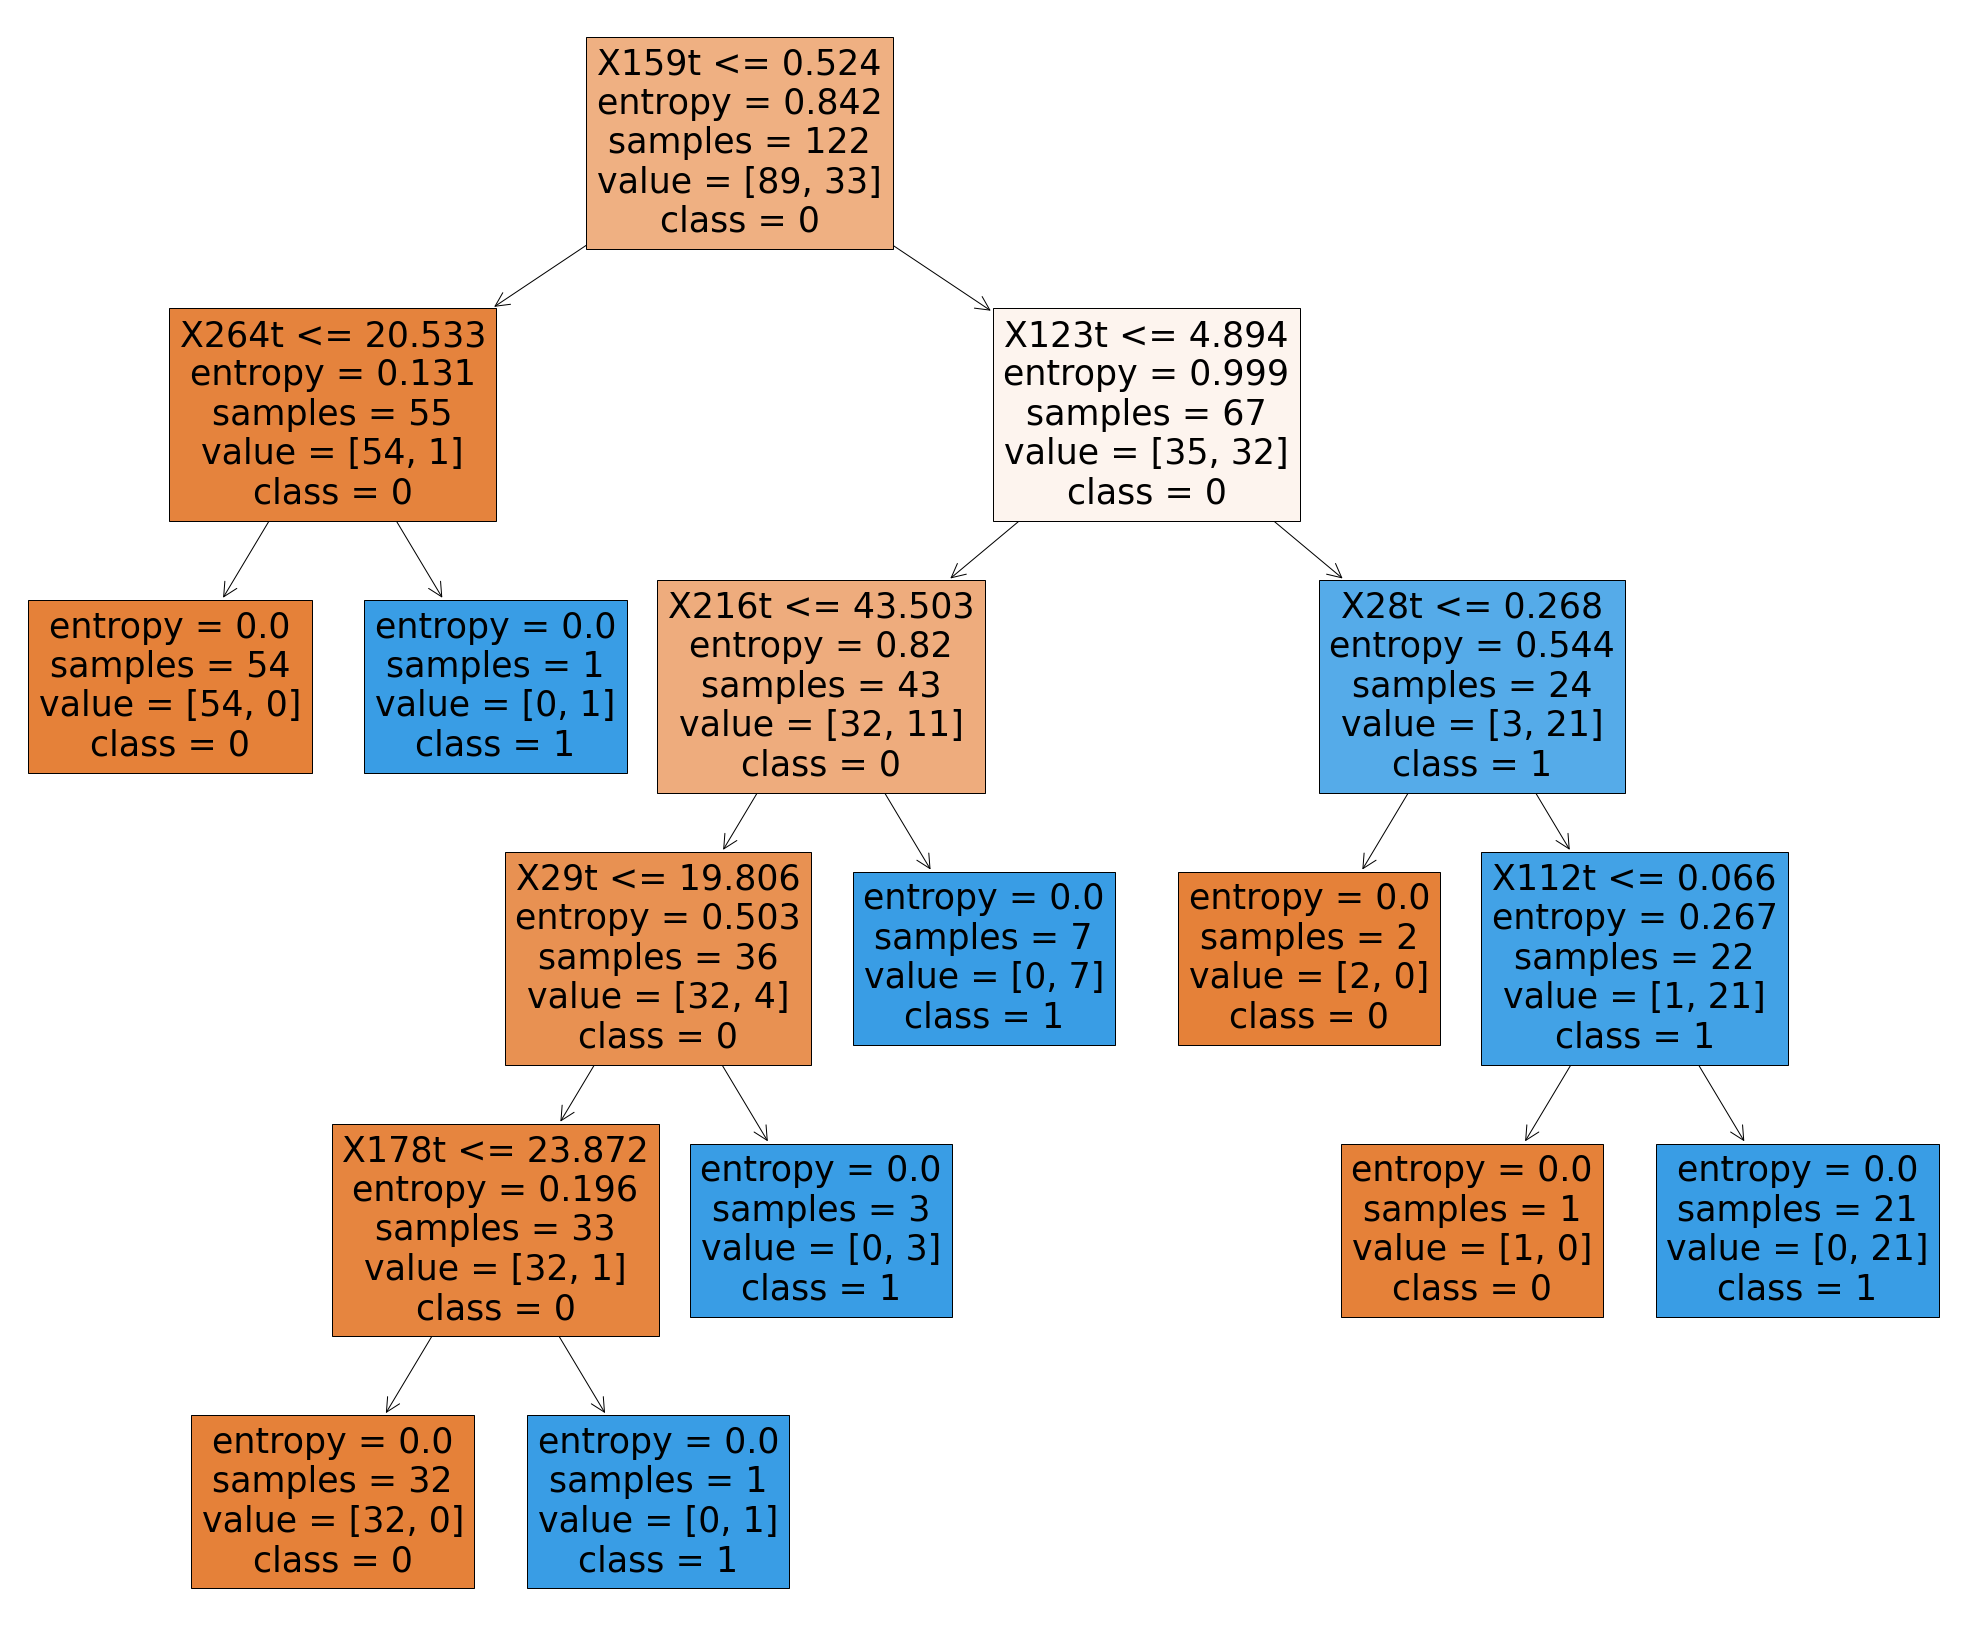

In [30]:
fig = plt.figure(figsize=(35,30))
_ = tree.plot_tree(clf_entropy, 
                   feature_names=Xtrain.columns,  
                   class_names=list(np.unique(ytrain).astype(str)),
                   filled=True)